In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint

from RungeKutta import *

In [2]:
dir   = "DATA/"
file1 = 'BHBH.csv'
file2 = 'BHBHm.csv'

BHBH  = pd.read_csv(dir+file1)
BHBHm = pd.read_csv(dir+file2)

In [3]:
TMIN = 0;  TMAX = 100 # s
a0   = 56;   e0 = .02
#initial_state = (a0, e0)
NSTEPS        = int(1e6)

# just for the try
M1, M2 = 18e24, 21e24

h = ( TMAX - TMIN ) / (NSTEPS - 1.)
t = np.linspace(TMIN, TMAX, NSTEPS)

a, e = (np.zeros(shape=NSTEPS) for i in range(N))

a[0] = a0
e[0] = e0

for i in range(NSTEPS-1):
    yin    = [a[i], e[i]]
    yout   = ODE_RK( t[i], yin, h, M2, M1 )
    a[i+1] = yout[0]
    e[i+1] = yout[1]

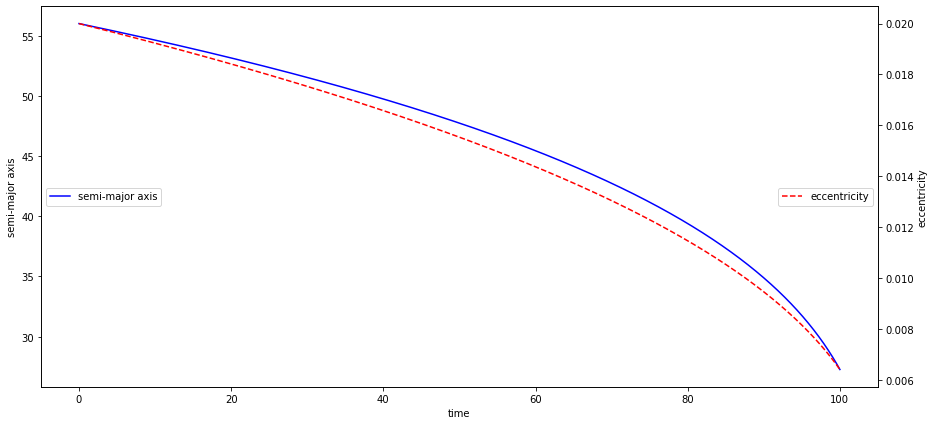

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')

ax_ = ax.twinx()
ax_.plot(t,e,'r--', label='eccentricity')
ax_.set_ylabel('eccentricity')
ax_.legend(loc='center right')
plt.show()

In [6]:
initial_state = (a0, e0)

def system_ODE(curr_state, t, M, m):
    return deriv( t, curr_state, M, m )

z = odeint(system_ODE, initial_state, t, args=(M2, M1))

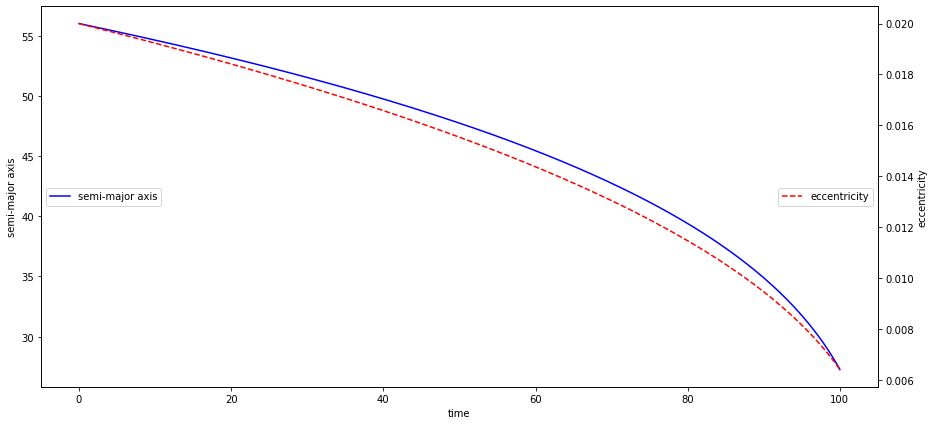

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,z[:,0],'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')

ax_ = ax.twinx()
ax_.plot(t,z[:,1],'r--', label='eccentricity')
ax_.set_ylabel('eccentricity')
ax_.legend(loc='center right')
plt.show()